## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [54]:
# Your code here - remember to use markdown cells for comments as well!

In [73]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [74]:
!ls data

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [55]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [56]:
#df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [60]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [61]:
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [62]:
# get rid of rows with less than 40% non NAN values

rows = len(df)
missing = df.isna().sum()
percentage_missing = missing/rows

percentage_missing_df = pd.DataFrame({'Missing': percentage_missing})
percentage_missing_df.sort_values('Missing', ascending = False, inplace = True)

print(percentage_missing_df[percentage_missing_df['Missing']> .05])

                         Missing
Schedule                0.858562
Air.carrier             0.812856
FAR.Description         0.640021
Aircraft.Category       0.637053
Longitude               0.613604
Latitude                0.613503
Airport.Code            0.435138
Airport.Name            0.406574
Broad.phase.of.flight   0.306144
Publication.Date        0.171980
Total.Serious.Injuries  0.141404
Total.Minor.Injuries    0.134918
Total.Fatal.Injuries    0.128937
Engine.Type             0.080330
Report.Status           0.072506
Purpose.of.flight       0.070382
Number.of.Engines       0.069167
Total.Uninjured         0.067234
Weather.Condition       0.051271


In [63]:
# drop columns with over 60% null values
drop_columns = list(percentage_missing_df[percentage_missing_df['Missing']>0.5].index)
df.drop(columns = drop_columns, axis = 1, inplace = True)
print(drop_columns)

['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Longitude', 'Latitude']


In [64]:
before = len(df)
df = df[(df['Investigation.Type'] == 'Accident') & (df['Country'] == 'United States')]
dropped = before - len(df)
print(str(dropped) + ' rows dropped.')

9052 rows dropped.


In [65]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [66]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79906 entries, 0 to 90347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                79906 non-null  object        
 1   Investigation.Type      79906 non-null  object        
 2   Accident.Number         79906 non-null  object        
 3   Event.Date              79906 non-null  datetime64[ns]
 4   Location                79895 non-null  object        
 5   Country                 79906 non-null  object        
 6   Airport.Code            47566 non-null  object        
 7   Airport.Name            50000 non-null  object        
 8   Injury.Severity         79854 non-null  object        
 9   Aircraft.damage         78782 non-null  object        
 10  Registration.Number     79903 non-null  object        
 11  Make                    79894 non-null  object        
 12  Model                   79877 non-null  object

In [67]:
#Add a day, month & year column
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Name.Abbr'] = df['Event.Date'].dt.day_name().str[:3]

# Add a weekend column
df.loc[(df['Day.Name.Abbr'] == 'Sat') | (df['Day.Name.Abbr'] == 'Sun'), 'Weekend'] = True
df.loc[(df['Day.Name.Abbr'] != 'Sat') & (df['Day.Name.Abbr'] != 'Sun'), 'Weekend'] = False

# Remove data before 1982
df = df[df['Year'] >= 1982]

In [75]:
# Merge same airport names togheter
df.loc[:, 'Airport.Name'] = df['Airport.Name'].fillna('')  # Fill NaN values with empty strings

# Replace values
df.loc[df['Airport.Name'].str.contains('(?i)^.*private.*$', regex=True), 'Airport.Name'] = 'PRIVATE'
df.loc[df['Airport.Name'].str.contains('(?i)none', regex=True), 'Airport.Name'] = 'NONE'

# Replace empty strings with NaN
df.loc[df['Airport.Name'] == '', 'Airport.Name'] = np.nan
df['Airport.Name'].value_counts().nlargest(10)

PRIVATE          1204
NONE              226
MERRILL FIELD      83
VAN NUYS           79
MUNICIPAL          75
CENTENNIAL         74
UNKNOWN            68
CHINO              53
BIRCHWOOD          49
SEDONA             47
Name: Airport.Name, dtype: int64

In [76]:
df['Registration.Number'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Registration.Number'].value_counts().nlargest(10)

NONE      406
UNREG     114
N20752      7
N5408Y      6
N11VH       6
N121CC      6
N53893      6
N8402K      6
N4101E      6
N5246E      5
Name: Registration.Number, dtype: int64

In [77]:
# Merge different capitalizations of Make togheter
df['Make'] = df['Make'].str.title()
df['Make'].value_counts().nlargest(10)

Cessna      25566
Piper       14008
Beech        4892
Bell         2236
Mooney       1272
Grumman      1131
Bellanca     1036
Boeing        931
Robinson      916
Hughes        868
Name: Make, dtype: int64

In [78]:
# Transform Amateur Built to boolean
df['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
df['Amateur.Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)
df['Amateur.Built'].value_counts()

False    71589
True      8295
Name: Amateur.Built, dtype: int64

In [79]:
# Split location in city and state
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df[['City', 'State']].head(10)

,City,State
7,PULLMAN,WA
8,EAST HANOVER,NJ
9,JACKSONVILLE,FL
10,HOBBS,NM
11,TUSKEGEE,AL
12,HOMER,LA
13,HEARNE,TX
14,CHICKASHA,OK
15,LITTLE ROCK,AR
16,MIDWAY,UT


In [80]:
# Remove amount of injuries as this is aleady in another column
df['Injury.Severity'] = df['Injury.Severity'].str.split('(').str[0]
df['Injury.Severity'].value_counts()

Non-Fatal      64457
Fatal          15019
Minor            203
Serious          153
Unavailable       15
Name: Injury.Severity, dtype: int64

In [81]:
# Merge weather condition unknowns
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather.Condition'].value_counts()

VMC        73340
IMC         5387
Unknown      611
Name: Weather.Condition, dtype: int64

## DATA EXPLORATION

In [82]:
injury_data = df[df['Injury.Severity'] != 'Unavailable']

# Number of accidents per year
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
accidents_per_year

,Year,Event.Id
0,1982,3445
1,1983,3391
2,1984,3290
3,1985,2972
4,1986,2758
5,1987,2665
6,1988,2537
7,1989,2410
8,1990,2403
9,1991,2350


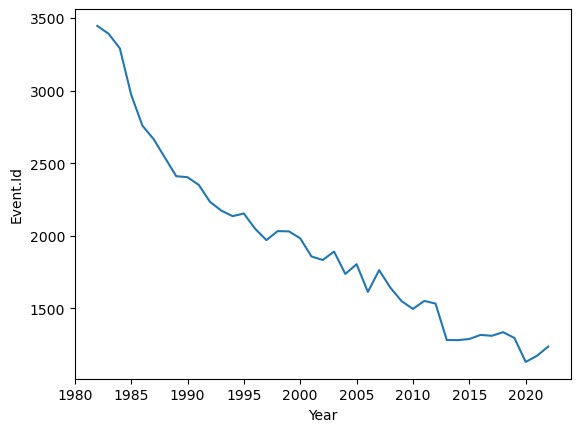

In [83]:
plot = sns.lineplot(x = 'Year', y = 'Event.Id', data = accidents_per_year)

In [26]:
fatal_accidents_per_year = df[df['Injury.Severity'] == 'Fatal'].groupby(['Year'], as_index = False)['Event.Id'].count()
fatal_accidents_per_year

,Year,Event.Id
0,1982,644
1,1983,654
2,1984,617
3,1985,558
4,1986,516
5,1987,489
6,1988,492
7,1989,479
8,1990,499
9,1991,478


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Number of aviation accidents per month')]

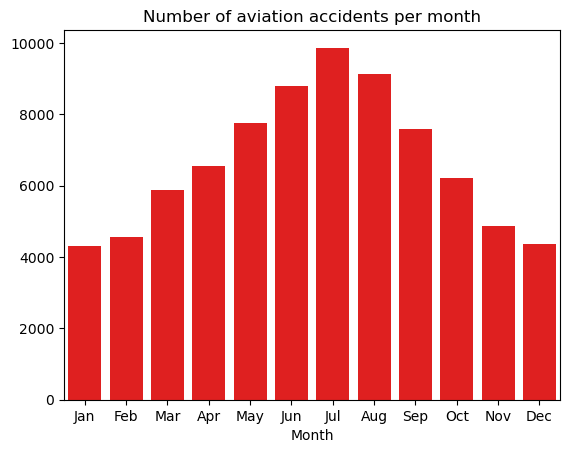

In [27]:
# Months with the most accidents
plot = sns.countplot(x = 'Month.Abbr', color = 'r', data = df)
plot.set(xlabel = 'Month', ylabel = None, title = 'Number of aviation accidents per month')

[Text(0.5, 0, 'day'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Number of aviation accidents per day of the week')]

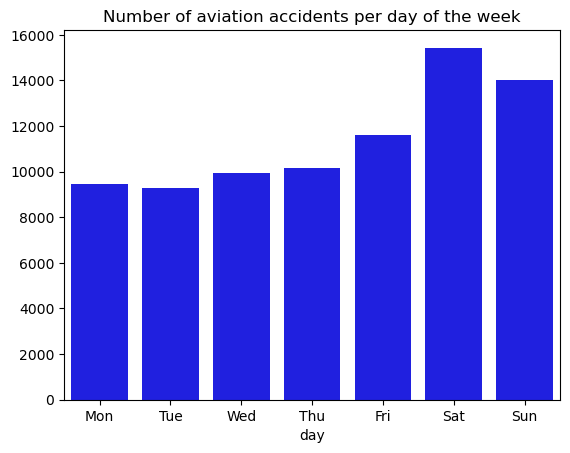

In [28]:
# Days with the most accidents
plot = sns.countplot(x = 'Day.Name.Abbr', order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], color = 'b', data = df)
plot.set(xlabel = 'day', ylabel = None, title = 'Number of aviation accidents per day of the week')

In [29]:
# Remove data with unknown purpose
purpose_data = df[df['Purpose.of.flight'] != 'Unknown']

In [30]:
# Calculate relative importance of purpose depending on weekend
weekday_accidents = len(purpose_data[purpose_data['Weekend'] == False])
weekday_data = purpose_data[purpose_data['Weekend'] == False]['Purpose.of.flight'].value_counts() / weekday_accidents

weekend_accidents = len(purpose_data[purpose_data['Weekend'] == True])
weekend_data = purpose_data[purpose_data['Weekend'] == True]['Purpose.of.flight'].value_counts() / weekend_accidents

In [31]:
# Merge data togheter
purpose_day_data = pd.merge(weekday_data, weekend_data, left_index=True, right_index=True)

In [32]:
# Rename columns and only keep top 5 purposes
purpose_day_data.reset_index(inplace = True)
purpose_day_data.rename(columns={'index': 'Purpose', 'Purpose.of.flight_x': 'Weekday', 'Purpose.of.flight_y': 'Weekend'}, inplace=True)
purpose_day_data = purpose_day_data.iloc[:5] 

In [33]:
# Melt the data so it can be used in a Seaborn plot
melted_pdd = purpose_day_data.melt('Purpose', var_name='day', value_name='percentage')

NameError: name 'PercentFormatter' is not defined

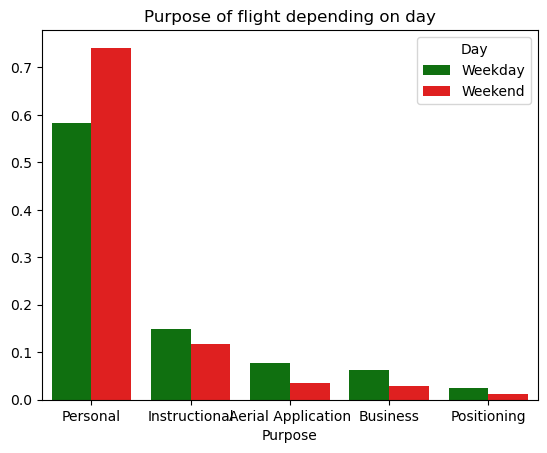

In [34]:
# Plot the data
ax = sns.barplot(x='Purpose', y='percentage', hue='day', data = melted_pdd, palette = ['g','r'])
ax.set(ylabel = None, title = 'Purpose of flight depending on day')
plt.legend(title = "Day")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [ ]:
# At what stage do accidents happen
stage_of_flight_data = df[(df['Broad.phase.of.flight'] != 'Unknown') & (df['Broad.phase.of.flight'] != 'Other')]
plot = sns.countplot(x = 'Broad.phase.of.flight', order = stage_of_flight_data['Broad.phase.of.flight'].value_counts().index, color = 'b', data = stage_of_flight_data)
plot.set(xlabel = 'Stage of flight', ylabel = None, title = 'Number of aviation accidents per phase of flight')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30, ha = 'right')

In [ ]:
df.dropna(subset=['Event.Date'], inplace=True)

In [ ]:
df

In [84]:
df.loc[:, 'Event.Date'] = df['Event.Date'].apply(pd.to_datetime)

In [85]:
attributes = ['Number.of.Engines', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built', 'Engine.Type']
safety_metrics = ['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

selected_columns = attributes + safety_metrics
df_selected = df[selected_columns]

In [86]:
df_selected

,Number.of.Engines,Aircraft.damage,Make,Model,Amateur.Built,Engine.Type,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
7,1.0,Substantial,Cessna,140,False,Reciprocating,Non-Fatal,0.0,0.0,0.0,2.0
8,2.0,Substantial,Cessna,401B,False,Reciprocating,Non-Fatal,0.0,0.0,0.0,2.0
9,1.0,Substantial,North American,NAVION L-17B,False,Reciprocating,Non-Fatal,0.0,0.0,3.0,0.0
10,1.0,Substantial,Piper,PA-28-161,False,Reciprocating,Non-Fatal,0.0,0.0,0.0,1.0
11,1.0,Substantial,Beech,V35B,False,Reciprocating,Non-Fatal,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
90343,NaN,NaN,Piper,PA-28-151,False,NaN,Minor,0.0,1.0,0.0,0.0
90344,NaN,NaN,Bellanca,7ECA,False,NaN,NaN,0.0,0.0,0.0,0.0
90345,1.0,Substantial,American Champion Aircraft,8GCBC,False,NaN,Non-Fatal,0.0,0.0,0.0,1.0
90346,NaN,NaN,Cessna,210N,False,NaN,NaN,0.0,0.0,0.0,0.0


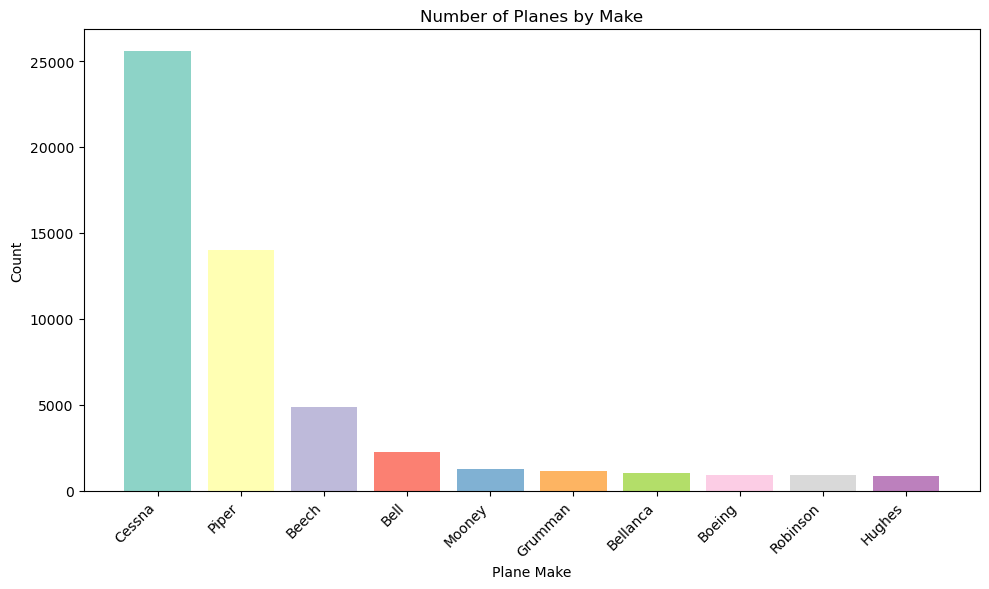

In [87]:
make_counts = df['Make'].value_counts()

#top_10_makes = make_counts.head(10)

# Create a colorful bar chart
plt.figure(figsize=(10, 6))
color_palette = plt.colormaps['Set3'] 

bars = plt.bar(make_counts.head(10).index, make_counts.head(10).values, color=color_palette(range(10)))

plt.xlabel('Plane Make')
plt.ylabel('Count')
plt.title('Number of Planes by Make')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [88]:
df['Model'].head()

7              140
8             401B
9     NAVION L-17B
10       PA-28-161
11            V35B
Name: Model, dtype: object

In [90]:
df.to_csv('data/output.csv', index=False)